# Project Title : Apple Stock Price Forecast

## Business Objective : Predict the Apple stock market price for next 30 days

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pickle import dump

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [3]:
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


### Dataset Details :-

**There are Open, High, Low and Close price has been given for each day starting from 2012 to 2019 for Apple stock.** 


* Date : Date of trading 
<br>

* Open : Price at which security first trades
<br>

* High : Highest Price of the trading day
<br>

* Low : Lowest Price of the trading day
<br>

* Close : Last Price the stock traded during the trading day
<br>

* Adj Close : Price that is adjusts Coroporate Actions on Closing Price
<br>

* Volume : Number of Shares that changed hands during the trading day

In [4]:
data.shape

(2011, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [6]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

- No null values in dataset

In [7]:
data.duplicated().any()

False

- No duplicated in dataset

In [8]:
# Summary statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


## Data Pre-processing

In [9]:
# Checking date column
data['Date']

0       03-01-2012
1       04-01-2012
2       05-01-2012
3       06-01-2012
4       09-01-2012
           ...    
2006    23-12-2019
2007    24-12-2019
2008    26-12-2019
2009    27-12-2019
2010    30-12-2019
Name: Date, Length: 2011, dtype: object

In [10]:
# convert date column into datetime format
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [11]:
# set date column as index
data.set_index('Date',inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [12]:
# drop irrelevant columns
data.drop(['Adj Close','Volume'],inplace=True,axis=1)

## EDA

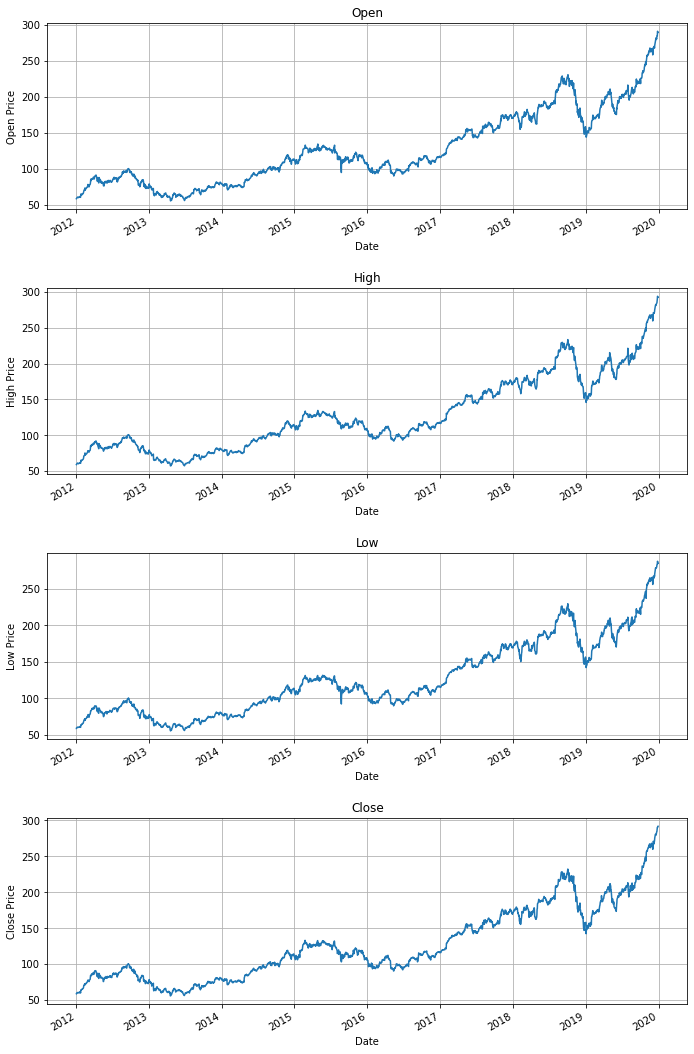

In [13]:
fig, (axs1,axs2,axs3,axs4) = plt.subplots(4,figsize=(10,15))

data['Open'].plot(ax=axs1)
axs1.set_xlabel('Date')
axs1.set_ylabel('Open Price')
axs1.grid(True)
axs1.set_title('Open')

data['High'].plot(ax=axs2)
axs2.set_xlabel('Date')
axs2.set_ylabel('High Price')
axs2.grid(True)
axs2.set_title('High')

data['Low'].plot(ax=axs3)
axs3.set_xlabel('Date')
axs3.set_ylabel('Low Price')
axs3.grid(True)
axs3.set_title('Low')

data['Close'].plot(ax=axs4)
axs4.set_xlabel('Date')
axs4.set_ylabel('Close Price')
axs4.grid(True)
axs4.set_title('Close')

fig.tight_layout(pad=2.0)

plt.show()

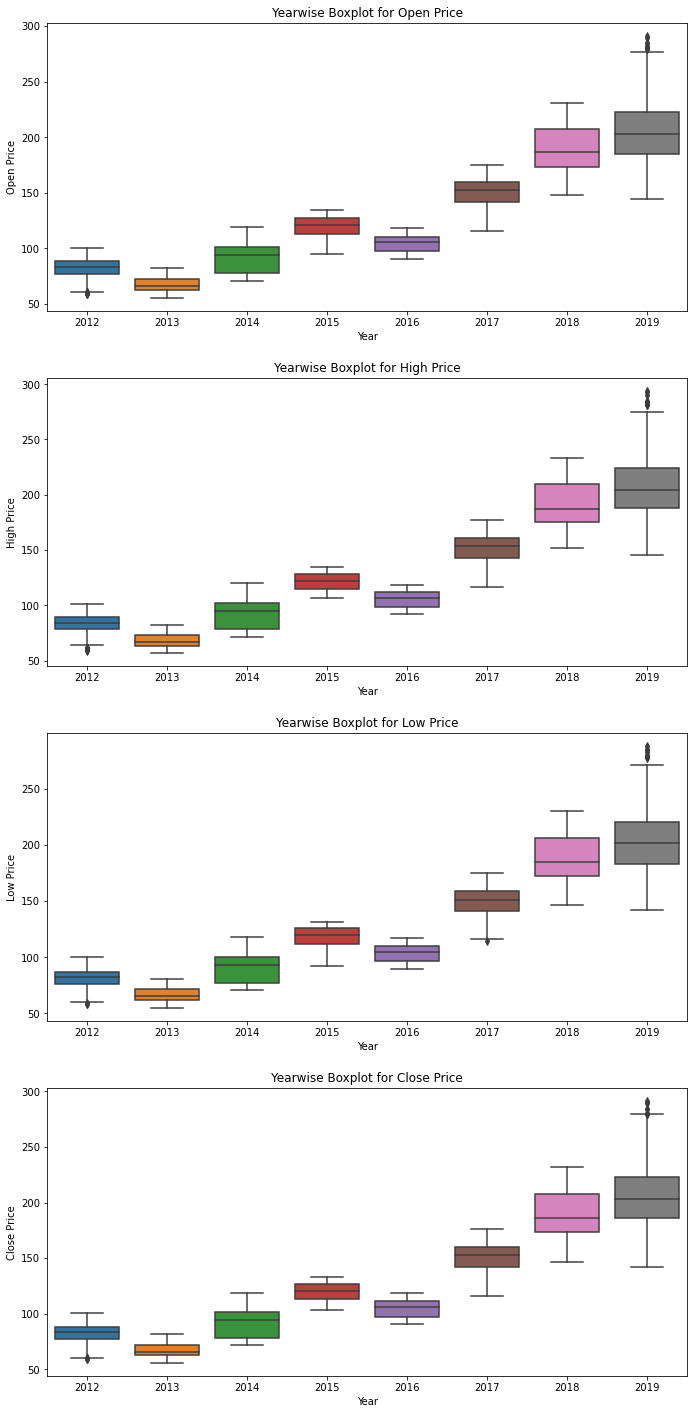

In [14]:
fig, (axs1,axs2,axs3,axs4) = plt.subplots(4,figsize=(10,20))

sns.boxplot(y=data['Open'],x=data.index.year,ax=axs1)
axs1.set_xlabel('Year')
axs1.set_ylabel('Open Price')
axs1.set_title('Yearwise Boxplot for Open Price')

sns.boxplot(y=data['High'],x=data.index.year,ax=axs2)
axs2.set_xlabel('Year')
axs2.set_ylabel('High Price')
axs2.set_title('Yearwise Boxplot for High Price')

sns.boxplot(y=data['Low'],x=data.index.year,ax=axs3)
axs3.set_xlabel('Year')
axs3.set_ylabel('Low Price')
axs3.set_title('Yearwise Boxplot for Low Price')

sns.boxplot(y=data['Close'],x=data.index.year,ax=axs4)
axs4.set_xlabel('Year')
axs4.set_ylabel('Close Price')
axs4.set_title('Yearwise Boxplot for Close Price')

fig.tight_layout(pad = 2.0)
plt.show()

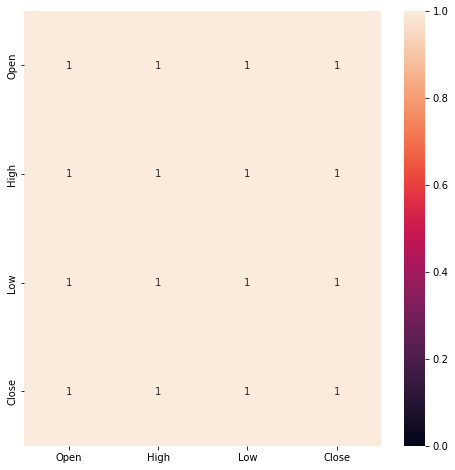

In [15]:
corr_matrix = data.corr()

plt.figure(figsize=(8,8))
sns.heatmap(data = corr_matrix,annot=True,vmin=0)
plt.show()

* Multicollinearity between fetures are identified.
* Close price is selected as target feature.

In [16]:
# Selecting close price as target variable
data_close = pd.DataFrame(data['Close'])
data_close.head()

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


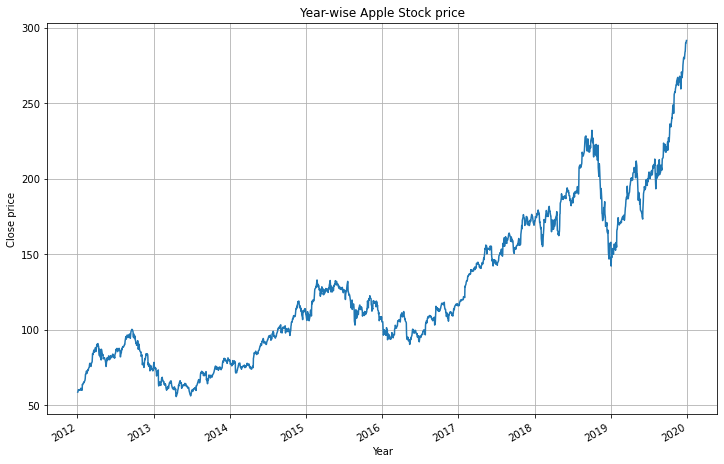

In [17]:
plt.figure(figsize=(12,8))
data_close['Close'].plot()
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Close price')
plt.title('Year-wise Apple Stock price')
plt.show()

* Apple stock price is getting increased each year.
* Huge stock price drop in year 2018-19.

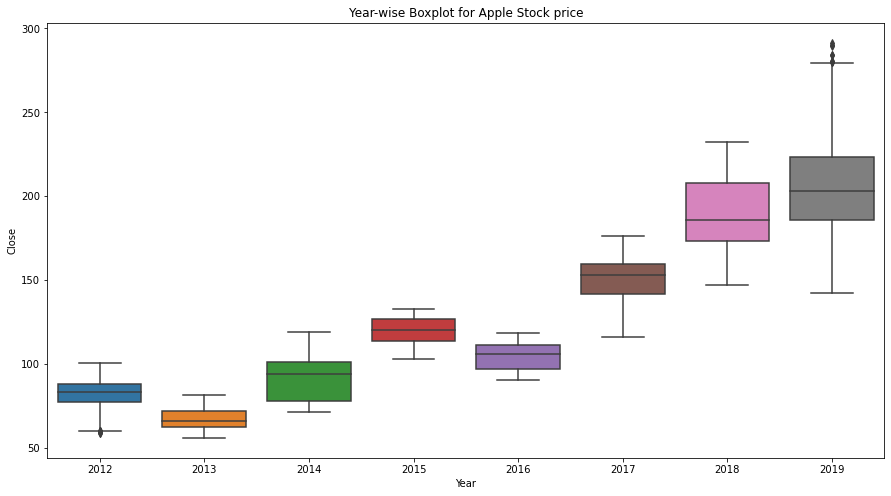

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(x= data_close.index.year, y= data_close['Close'])
plt.title('Year-wise Boxplot for Apple Stock price')
plt.xlabel('Year')
plt.ylabel('Close')
plt.show()

* Outliers are detected in year 2012 and 2019.
* 2019 is the most volatile year.

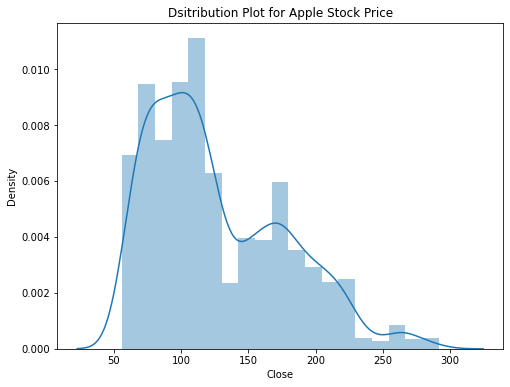

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(data_close['Close'],)
plt.title('Dsitribution Plot for Apple Stock Price')
plt.show()

* Stock price is right skewed.

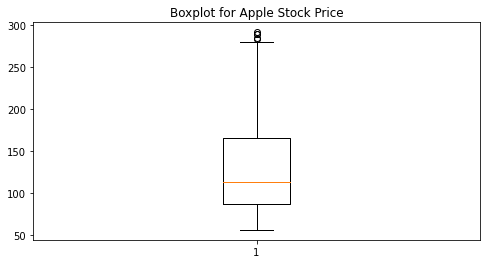

In [20]:
plt.figure(figsize=(8,4))
box = plt.boxplot(data_close['Close'])
plt.title('Boxplot for Apple Stock Price')
plt.show()

* Stock price is right skewed and outliers detected.

In [21]:
# Finding the outlier values
for elem in box['fliers']:
    print(elem)
    print(elem.get_ydata())


Line2D(_line6)
[284.       284.269989 289.910004 289.799988 291.519989]


In [22]:
print(data_close.loc[data_close['Close'] == 284.])
print(data_close.loc[data_close['Close'] == 284.269989] )
print(data_close.loc[data_close['Close'] == 289.910004])
print(data_close.loc[data_close['Close'] == 289.799988 ])
print(data_close.loc[data_close['Close'] == 291.519989 ])

            Close
Date             
2019-12-23  284.0
                 Close
Date                  
2019-12-24  284.269989
                 Close
Date                  
2019-12-26  289.910004
                 Close
Date                  
2019-12-27  289.799988
                 Close
Date                  
2019-12-30  291.519989


* Outliers are detected on dates 2019-12-23, 2019-12-24, 2019-12-26, 2019-12-27 and 2019-12-30.

In [23]:
data_close['Day'] = data_close.index.strftime('%A')
data_close['Month'] = data_close.index.strftime('%B')
data_close['Year'] = data_close.index.year
data_close['Quarter'] = data_close.index.quarter
data_close['Week_Number'] = data_close.index.week
data_close

,Close,Day,Month,Year,Quarter,Week_Number
Date,,,,,,
2012-01-03,58.747143,Tuesday,January,2012,1,1
2012-01-04,59.062859,Wednesday,January,2012,1,1
2012-01-05,59.718571,Thursday,January,2012,1,1
2012-01-06,60.342857,Friday,January,2012,1,1
2012-01-09,60.247143,Monday,January,2012,1,2
...,...,...,...,...,...,...
2019-12-23,284.000000,Monday,December,2019,4,52
2019-12-24,284.269989,Tuesday,December,2019,4,52
2019-12-26,289.910004,Thursday,December,2019,4,52


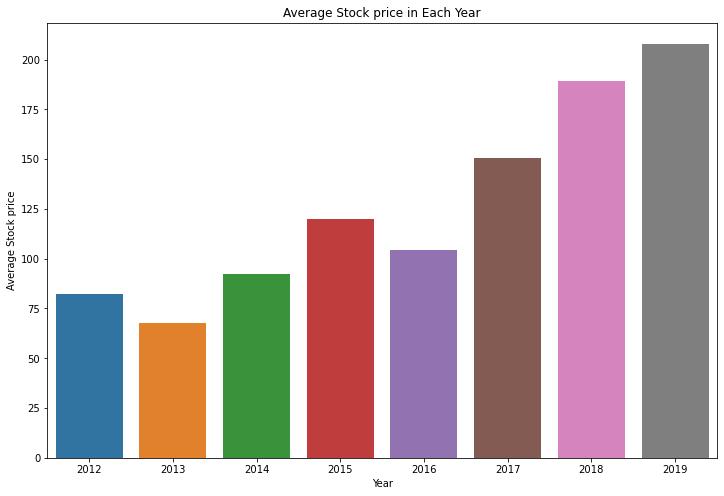

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(x='Year', y='Close',data=data_close,palette='tab10',ci=0)
plt.title('Average Stock price in Each Year')
plt.xlabel('Year')
plt.ylabel('Average Stock price')
plt.show()

* Apple stock price is increasing each year.
* In 2013 and 2016 average stock price is lower than previous year.


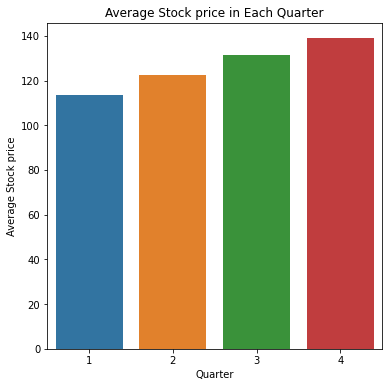

In [25]:
data_quarter = pd.DataFrame(data_close.groupby('Quarter')['Close'].mean()).reset_index()

plt.figure(figsize=(6,6))
sns.barplot(x='Quarter', y='Close',data=data_quarter,palette='tab10',ci=0)
plt.title('Average Stock price in Each Quarter')
plt.ylabel('Average Stock price')
plt.show()

* Q4 has the highest average stock price

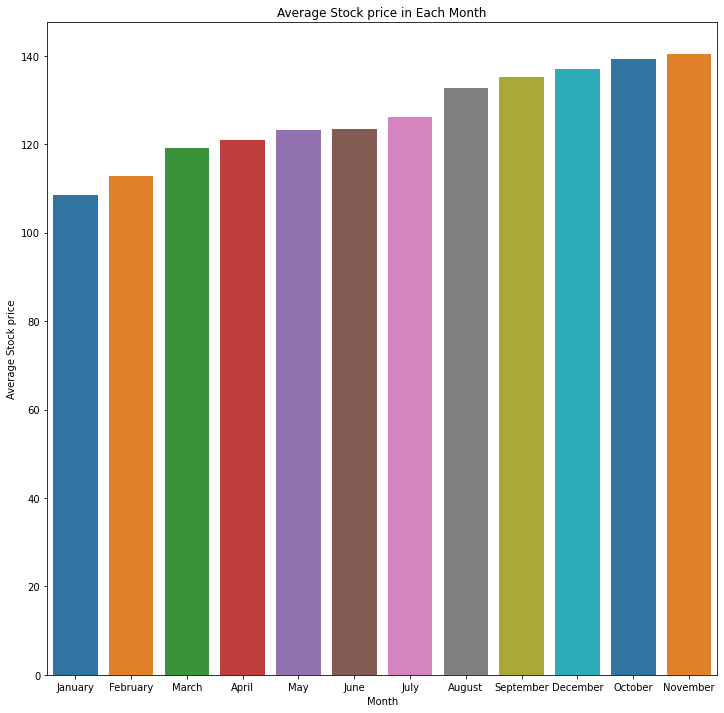

In [26]:
data_month = pd.DataFrame(data_close.groupby('Month')['Close'].mean()).reset_index().sort_values('Close')

plt.figure(figsize=(12,12))
sns.barplot(x='Month', y='Close',data=data_month,palette='tab10',ci=0)
plt.title('Average Stock price in Each Month')
plt.ylabel('Average Stock price')
plt.show()

* Average stock price is highest in November.

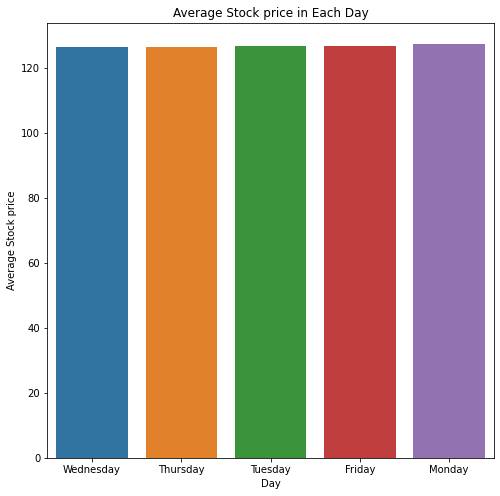

In [27]:
data_day = pd.DataFrame(data_close.groupby('Day')['Close'].mean()).reset_index().sort_values('Close')

plt.figure(figsize=(8,8))
sns.barplot(x='Day', y='Close',data=data_day,palette='tab10',ci=0)
plt.title('Average Stock price in Each Day')
plt.ylabel('Average Stock price')
plt.show()

* Average stock price are almost same in each day of week.
* It is slightly high on Mondays.

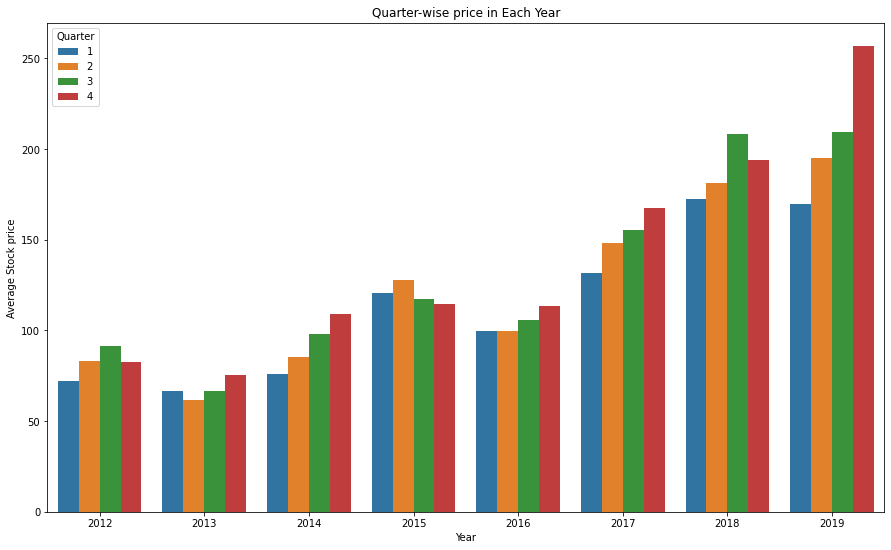

In [28]:
plt.figure(figsize=(15,9))
sns.barplot(x='Year', y='Close',data=data_close,hue='Quarter',palette='tab10',ci=0)
plt.title('Quarter-wise price in Each Year')
plt.xlabel('Year')
plt.ylabel('Average Stock price')
plt.show()

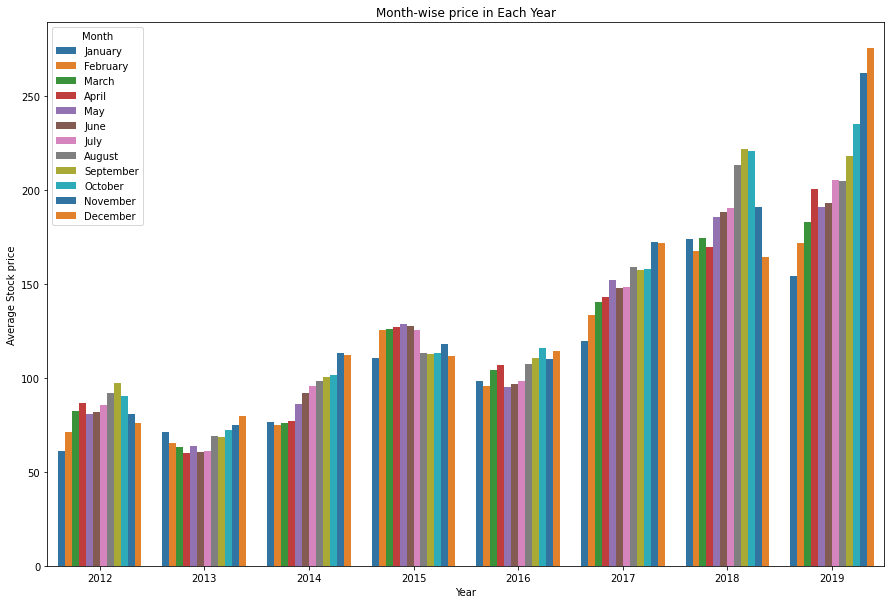

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year', y='Close',data=data_close,hue='Month',palette='tab10',ci=0)
plt.title('Month-wise price in Each Year')
plt.xlabel('Year')
plt.ylabel('Average Stock price')
plt.show()

* On an average Apple stock price is low at start of the year compared to end of the year.

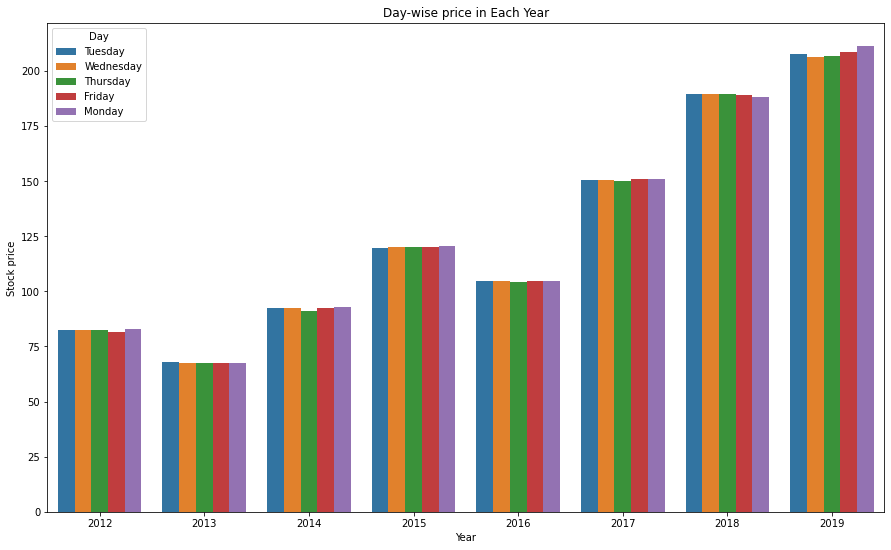

In [30]:
plt.figure(figsize=(15,9))
sns.barplot(x='Year', y='Close',data=data_close,hue='Day',palette='tab10',ci=0)
plt.title('Day-wise price in Each Year')
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.show()

### Seasonal Decompose

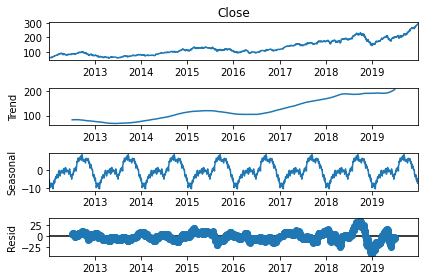

In [31]:
sd = seasonal_decompose(data_close['Close'],period=251)
sd.plot()
plt.show()

* Time series has upward trend.
* Seasonal periods are 251 days.

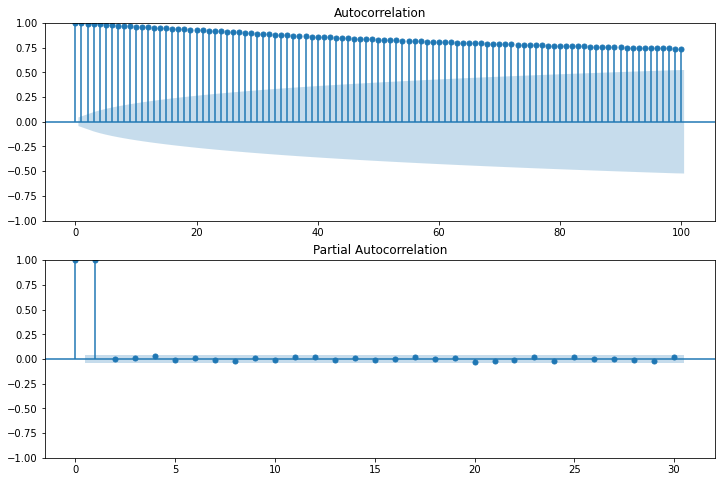

In [32]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,8))
plot_acf(data_close['Close'],lags=100,ax=ax1)
plot_pacf(data_close['Close'],lags=30,ax=ax2)
plt.show()

## Insights from EDA

* Time series data has trend and seasonality. Trend is upward and seasonal period is 251 days.
<br>

* The year 2019 is the most volatile year. A huge drop in stock price happened in the same year. The primary reason for this is as investors are worried about iphone sales since the sales figures of iphone's new line-up wasn't that good compared to previous.
<br>

* Q4 is the best quarter for Apple according to average stock price. This is because the new product cycle takes place in this period. We also observe this as a seasonal effect for Apple.

In [33]:
data_close = pd.DataFrame(data.Close)

# Model Building

Checking stationarity of time series using Augmented Dickey Fuller Test

$H_0$: Time series is not stationary.<br>
$H_1$: Time series is stationary.

In [34]:
adfuller(data_close.Close)

(1.2193701254377995,
 0.9961170178032009,
 9,
 2001,
 {'1%': -3.433622218212895,
  '5%': -2.8629854902259004,
  '10%': -2.5675395171404802},
 8633.09680956294)

* We fail to reject $H_0$ since the p value is greater than significant value.
* Time series is non-stationary.

Differencing series to make it stationary

### Differencing

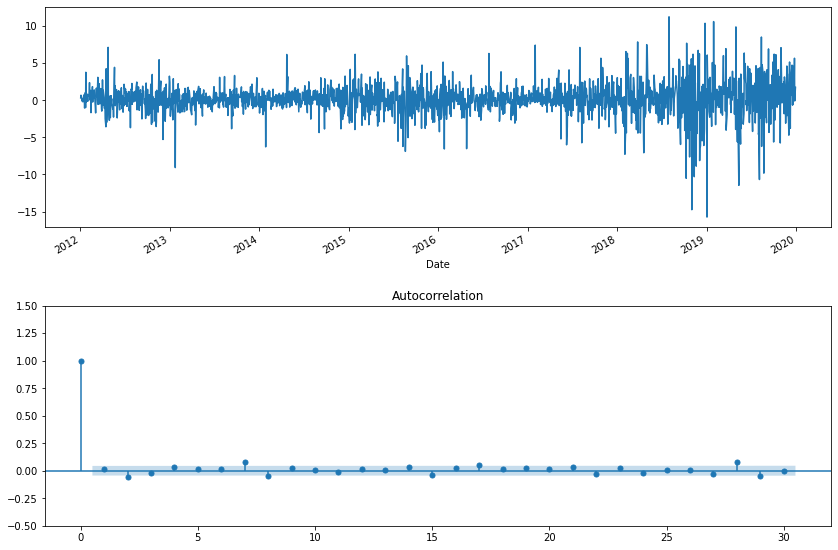

In [35]:
#First order differencing
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,8))
data_close['Close'].diff().plot(ax=ax1)
plot_acf(data_close['Close'].diff().dropna(),lags=30,ax=ax2)
ax2.set_ylim(-0.5,1.5)
plt.tight_layout(pad=2)
plt.show()

In [36]:
adfuller(data_close.Close.diff().dropna())

(-13.625534323873223,
 1.7631231987211936e-25,
 8,
 2001,
 {'1%': -3.433622218212895,
  '5%': -2.8629854902259004,
  '10%': -2.5675395171404802},
 8629.540212595413)

* p-value is less than significant value. Therefore series is stationary now.

* Order of differencing is 1.

### Order of AR term (p)

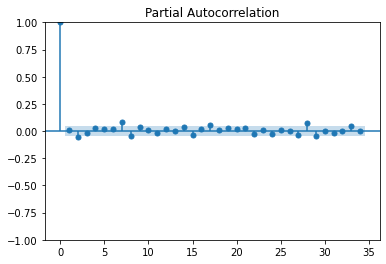

In [37]:
plot_pacf(data_close['Close'].diff().dropna())

plt.show()

### Order of MA term (q)

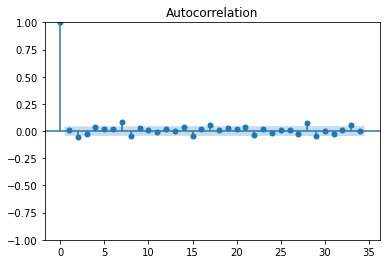

In [38]:
plot_acf(data_close['Close'].diff().dropna())
plt.show()

### ARIMA Model

In [39]:
# Converting the data in to data_train and data_test
data_train = data_close.loc[:'2017-12-29']
# Stock price from last 2 years are selected as data_test
data_test = data_close.loc['2018-01-02':]

In [40]:
model_arima = ARIMA(data_train['Close'],order=(0,1,0))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1509
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2795.585
Date:                Thu, 08 Dec 2022   AIC                           5593.170
Time:                        17:06:12   BIC                           5598.488
Sample:                             0   HQIC                          5595.150
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.3864      0.052     46.131      0.000       2.285       2.488
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):               859.19
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
test_pred = pd.DataFrame(result.predict(len(data_train),len(data_train)+501,typ='levels'))
test_pred.index = data_test.index
test_pred.columns=data_test.columns
test_pred

,Close
Date,
2018-01-02,169.229996
2018-01-03,169.229996
2018-01-04,169.229996
2018-01-05,169.229996
2018-01-08,169.229996
...,...
2019-12-23,169.229996
2019-12-24,169.229996
2019-12-26,169.229996


In [42]:
mse = mean_squared_error(test_pred.Close,data_test.Close)
rmse = np.round(np.sqrt(mse),2)
mape = np.round(mean_absolute_percentage_error(test_pred.Close,data_test.Close),3)

In [43]:
print('\n RMSE = ',rmse)
print('\n MAPE = ', mape)


 RMSE =  41.69

 MAPE =  0.186


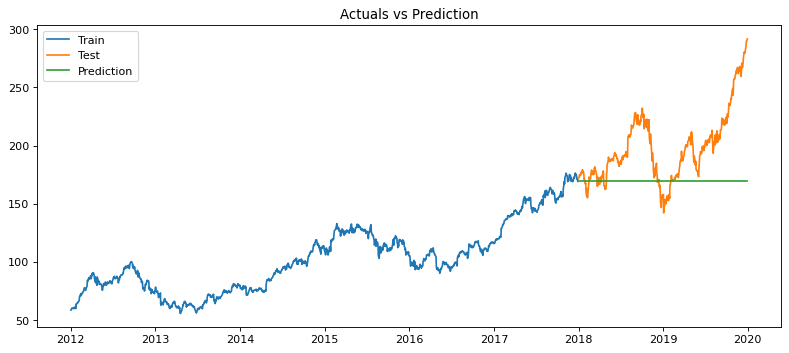

In [44]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

* From the above plot it is clear that ARIMA model is not performing well.

In [45]:
arima = ARIMA(data_close['Close'],order=(0,1,0))
arima_fit = arima.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2011
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4371.956
Date:                Thu, 08 Dec 2022   AIC                           8745.913
Time:                        17:06:12   BIC                           8751.519
Sample:                             0   HQIC                          8747.971
                               - 2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.5373      0.070     65.042      0.000       4.401       4.674
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):              3663.83
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               5.23   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
forecast = arima_fit.predict(len(data_close),len(data_close)+29,typ='levels')
forecast_df = pd.DataFrame(forecast)
forecast_df.columns=['Close']


In [47]:
# Getting date range for forecasting
date = pd.date_range('2020-01-01',periods=30, freq='B')
date_df = pd.DataFrame(date,columns=['Date'])

In [48]:
data_forecast = forecast_df.set_index(date_df.Date)
data_forecast.head()

,Close
Date,
2020-01-01,291.519989
2020-01-02,291.519989
2020-01-03,291.519989
2020-01-06,291.519989
2020-01-07,291.519989


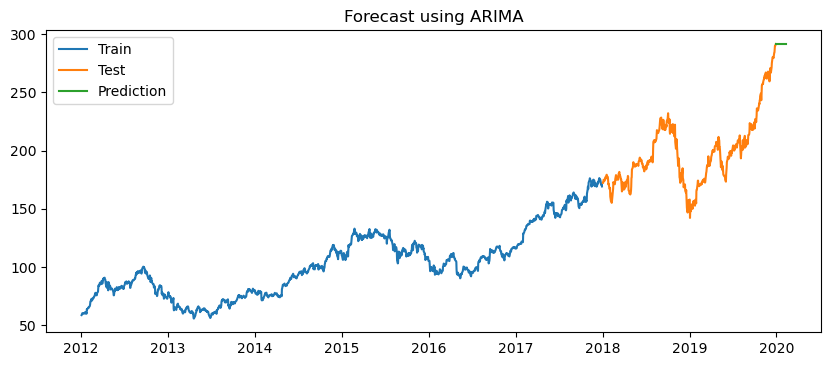

In [49]:
plt.figure(figsize=(10,4), dpi=100)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(data_forecast, label='Prediction')
plt.title('Forecast using ARIMA')
plt.legend(loc='upper left', fontsize=10)
plt.show()

## SARIMA

In [50]:
# Training the SARIMA model with data_train
model_sarima = sm.tsa.SARIMAX(data_train.Close,order=(2,1,0),seasonal_order=(1,1,0,63),enforce_invertibility=False,enforce_stationarity=False)
sarima_fit = model_sarima.fit()
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1509
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 63)   Log Likelihood               -2814.964
Date:                            Thu, 08 Dec 2022   AIC                           5637.928
Time:                                    17:06:37   BIC                           5658.847
Sample:                                         0   HQIC                          5645.754
                                           - 1509                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0140      0.023      0.595      0.552      -0.032       0.060
ar.L2         -0.0516      0.028     -1.872      0.061      -0.106       0.002
ar.S.L63      -0.5344      0.019    -28.075      0.000      -0.572      -0.497
sigma2         3.4618      0.079     43.641      0.000       3.306       3.617
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               719.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.00
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
# Predicting for data_test
prediction = sarima_fit.predict(len(data_train),len(data_train)+501)

test_prediction= pd.DataFrame(prediction)
test_prediction.columns = ['Close']
test_prediction.index = data_test.index
test_prediction

,Close
Date,
2018-01-02,168.667110
2018-01-03,169.417301
2018-01-04,168.233889
2018-01-05,169.891853
2018-01-08,170.319673
...,...
2019-12-23,278.560898
2019-12-24,278.473614
2019-12-26,278.010027


### Accuracy Metrics

In [52]:
rmse = np.round(np.sqrt(mean_squared_error(data_test.Close,test_prediction.Close)),2)
mape = np.round(mean_absolute_percentage_error(test_prediction.Close,data_test.Close),3)

print('\n RMSE = ',rmse)
print('\n MAPE = ', mape)


 RMSE =  39.34

 MAPE =  0.133


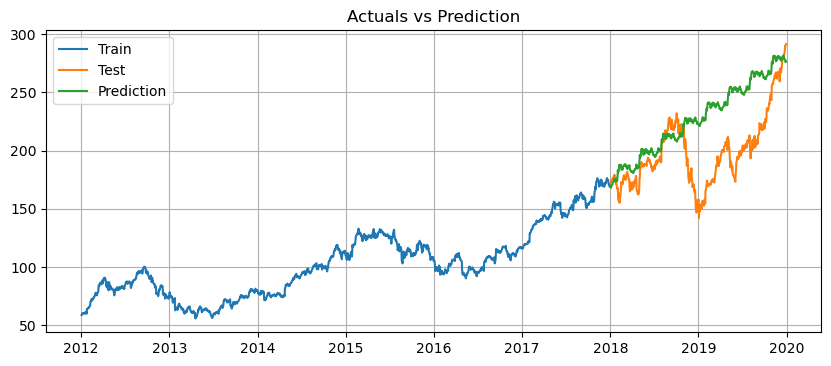

In [53]:
plt.figure(figsize=(10,4), dpi=100)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_prediction, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

* SARIMA model is capturing trend and seasonlity better than ARIMA and is performing well.

### Residual Plot

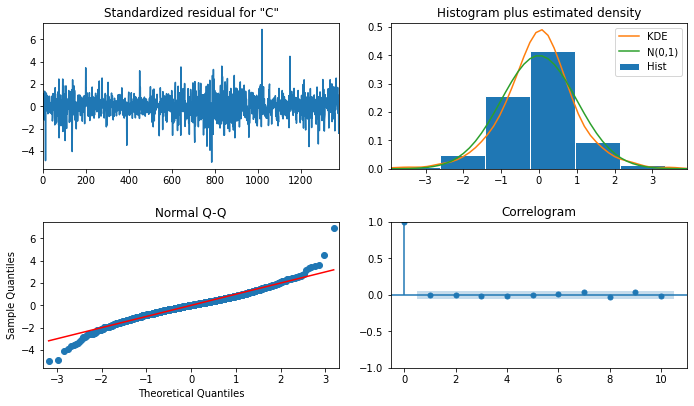

In [54]:
sarima_fit.plot_diagnostics(figsize=(10,6))
plt.tight_layout(pad=2)

* The residuals are normally distributed with mean 0 and constant variance 

### Rebuild the model for Forecasting

In [55]:
# Rebuilding the model for whole data
model_sarima_final = sm.tsa.SARIMAX(data_close.Close,order=(2,1,0),seasonal_order=(1,1,0,63))
sarima_fit_final = model_sarima_final.fit()

In [56]:
# Forecasting for next 30 days
forecast = sarima_fit_final.predict(len(data_close),len(data_close)+29)
forecast_df = pd.DataFrame(forecast)
forecast_df.columns = ['Close']

In [57]:
data_forecast = forecast_df.set_index(date_df.Date)
data_forecast

,Close
Date,
2020-01-01,292.331817
2020-01-02,290.573766
2020-01-03,291.412306
2020-01-06,292.350412
2020-01-07,292.989321
2020-01-08,292.672426
2020-01-09,293.232303
2020-01-10,295.531667
2020-01-13,299.531149


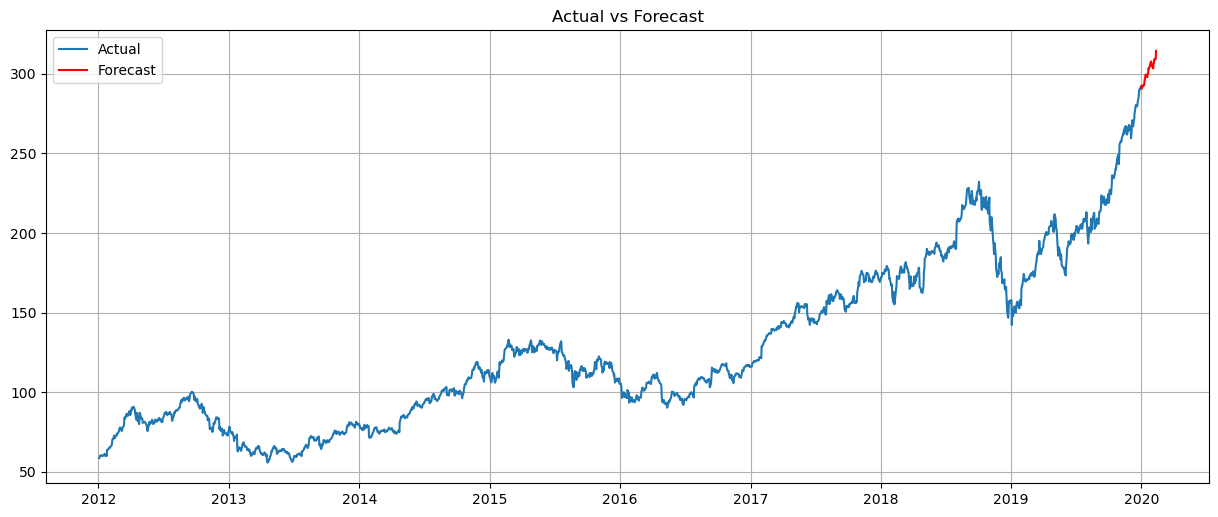

In [58]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(data_close, label = 'Actual')
plt.plot(data_forecast, label='Forecast',color='red')
plt.title('Actual vs Forecast')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

### Holt-Winters Method

In [59]:
# Since data is non-stationary we are using triple exponential smoothing.
Mul_Add = ExponentialSmoothing(data_train['Close'],trend='mul',seasonal='add',seasonal_periods=251)
result_TES = Mul_Add.fit()

In [60]:
test_pred_tes = pd.DataFrame(result_TES.forecast(502))
test_pred_tes.columns = ['Close']
test_pred_tes.index = data_test.index
test_pred_tes

,Close
Date,
2018-01-02,168.941208
2018-01-03,168.740879
2018-01-04,168.883720
2018-01-05,169.062957
2018-01-08,168.678751
...,...
2019-12-23,240.445349
2019-12-24,240.549197
2019-12-26,239.597066


### Accuracy Metrics

In [61]:
rmse_tes = np.round(np.sqrt(mean_squared_error(test_pred_tes.Close,data_test.Close)),2)
mape_tes = np.round(mean_absolute_percentage_error(data_test.Close,test_pred_tes.Close),2)
print('\n RMSE = ',rmse_tes)
print('\n MAPE = ',mape_tes)


 RMSE =  23.51

 MAPE =  0.1


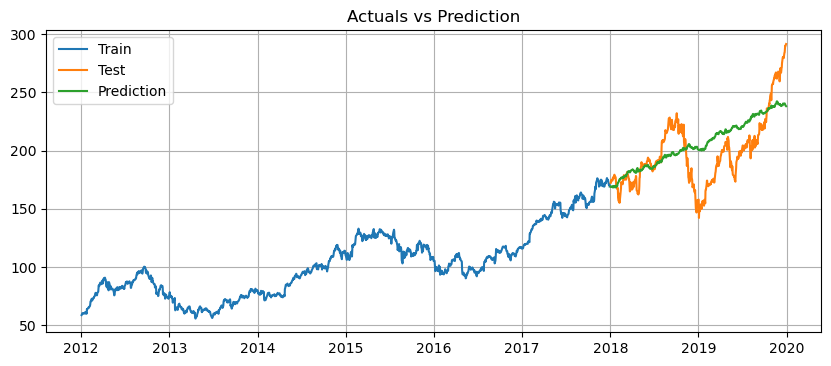

In [62]:
plt.figure(figsize=(10,4), dpi=100)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_pred_tes, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

### Forecast Using Holt-Winters

In [63]:
# Retrain the model is whole data
tes = ExponentialSmoothing(data_close['Close'],trend='mul',seasonal='add',seasonal_periods=251)
result_1 = tes.fit()

In [64]:
forecast_df_tes = pd.DataFrame(result_1.predict(len(data_close),len(data_close)+29))
forecast_df_tes.columns = ['CLose']
forecast_df_tes.index = date_df.Date
forecast_df_tes.head()

,CLose
Date,
2020-01-01,291.848284
2020-01-02,289.881020
2020-01-03,291.003111
2020-01-06,291.502945
2020-01-07,291.651243


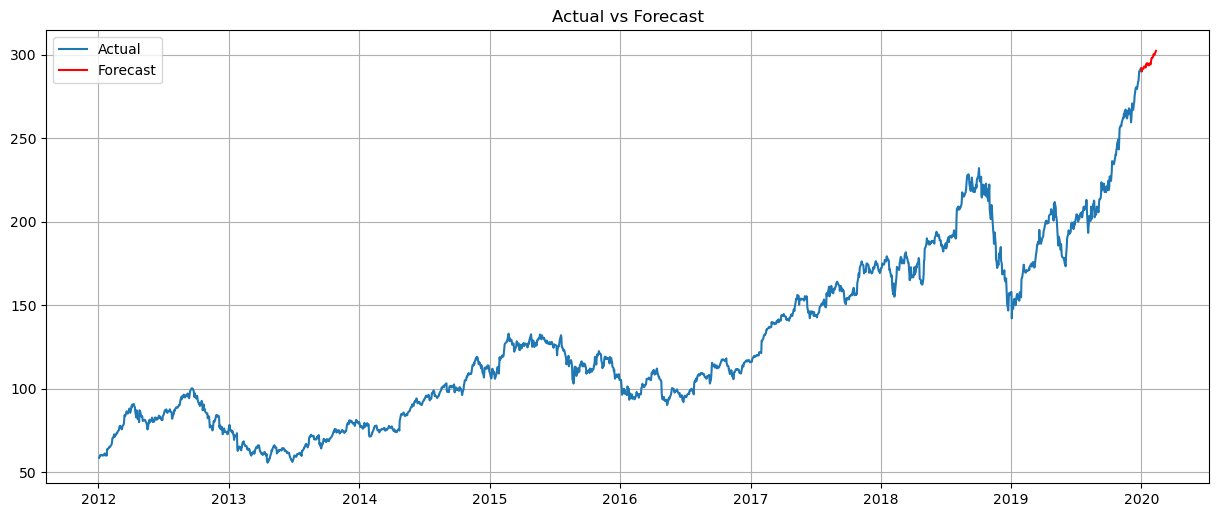

In [65]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(data_close, label = 'Actual')
plt.plot(forecast_df_tes, label='Forecast',color='red')
plt.title('Actual vs Forecast')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

## Deployment

In [67]:
#dump(sarima_fit_final,open('sarima_fit_final.sav','wb'))
dump(data_close,open('data_close.sav','wb'))

### Project Summary

* We build model using ARIMA, SARIMA and Holt-Winters method.
<br>

* We are not using ARIMA here, since it's not capturing seasonal part.
<br>

* Accuracy metrics of Holt-Winters method is the better compared to others, but still SARIMA captures seasonal part better.
<br>

* SARIMA is better at prediction and it has more parameters,since Holt-winters has only 3.
<br>

* We deployed the model using SARIMA(2,1,0)x(1,1,0,63).